In [129]:
import pymc
import numpy as np
import pandas as pd
import xarray as xr
import copy
import matplotlib.pyplot as plt
import pygemfxns_ensemble_sampling as es
import glob
import os
import run_calibration_list_multiprocess as rc
from pandas.plotting import autocorrelation_plot
import pygemfxns_ensemble_sampling as es
import matplotlib.mlab as mlab
from jupyterthemes import jtplot
from scipy.stats import gaussian_kde
import scipy.stats as stats
import seaborn as sns

jtplot.style('grade3', fscale=1.3)
jtplot.figsize(x=18, y=10)

In [2]:
filelist = glob.glob(os.path.join('../MCMC_data/' , '*.nc'))
print(filelist)
ensembles = {}
samples = []
for f in filelist:
    print(f)
    name = f[38:-32]
    samples.append(name)
    print(name)
    ds = xr.open_dataset(f)
    ensembles[name] = ds

['../MCMC_data/parameter_sets_4glaciers_10000samples_200ensembles_20180729take2.nc', '../MCMC_data/parameter_sets_4glaciers_5000samples_200ensembles_20180729take2.nc', '../MCMC_data/parameter_sets_1glaciers_1000samples_300ensembles_20180728.nc', '../MCMC_data/parameter_sets_4glaciers_10000samples_200ensembles_20180727.nc', '../MCMC_data/parameter_sets_4glaciers_200samples_200ensembles_20180728.nc', '../MCMC_data/parameter_sets_4glaciers_5000samples_200ensembles_20180727.nc', '../MCMC_data/parameter_sets_4glaciers_1000samples_200ensembles_20180727.nc', '../MCMC_data/parameter_sets_4glaciers_30000samples_200ensembles_20180727.nc', '../MCMC_data/parameter_sets_4glaciers_1000samples_200ensembles_20180729take2.nc', '../MCMC_data/parameter_sets_4glaciers_3000samples_200ensembles_20180727.nc']
../MCMC_data/parameter_sets_4glaciers_10000samples_200ensembles_20180729take2.nc
10000sampl
../MCMC_data/parameter_sets_4glaciers_5000samples_200ensembles_20180729take2.nc
5000sampl
../MCMC_data/paramet

Upload datsets of model run results

In [15]:
results = {}

filelist = glob.glob(os.path.join('../Output/' , '*s_all.nc'))
for f in filelist:
    print(f)
    name = f[66:-26]
    print(name)
    results[name] = xr.open_dataset(f)
    
filelist2 = glob.glob(os.path.join('../Output/' , '*2_all.nc'))
for f in filelist2:
    print(f)
    name = f[66:-31]
    print(name)
    results[name] = xr.open_dataset(f)

../Output/PyGEM_R15_MPI-ESM-LR_rcp26_biasadj_opt2_1995_2100_20180727_10000samples200ensembles_all.nc
27_10000
../Output/PyGEM_R15_MPI-ESM-LR_rcp26_biasadj_opt2_1995_2100_20180727_30000samples200ensembles_all.nc
27_30000
../Output/PyGEM_R15_MPI-ESM-LR_rcp26_biasadj_opt2_1995_2100_20180727_5000samples200ensembles_all.nc
27_5000
../Output/PyGEM_R15_MPI-ESM-LR_rcp26_biasadj_opt2_1995_2100_20180727_3000samples200ensembles_all.nc
27_3000
../Output/PyGEM_R15_MPI-ESM-LR_rcp26_biasadj_opt2_1995_2100_20180729_4glaciers5000samples200ensemblestake2_all.nc
29_4glaciers5000
../Output/PyGEM_R15_MPI-ESM-LR_rcp26_biasadj_opt2_1995_2100_20180729_4glaciers1000samples200ensemblestake2_all.nc
29_4glaciers1000
../Output/PyGEM_R15_MPI-ESM-LR_rcp26_biasadj_opt2_1995_2100_20180729_4glaciers10000samples200ensemblestake2_all.nc
29_4glaciers10000


Play with results

idx 0:10075, 1:10079, 2:10059, 3: 10060

In [189]:
results['27_10000']

<xarray.Dataset>
Dimensions:                       (elevbin: 882, glac_idx: 4, glac_table: 16, sim: 200, time: 1212, year: 101, year_plus1: 102)
Coordinates:
  * sim                           (sim) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
  * glac_idx                      (glac_idx) int32 0 1 2 3
  * time                          (time) datetime64[ns] 1999-10-01 ...
  * year                          (year) int32 2000 2001 2002 2003 2004 2005 ...
  * year_plus1                    (year_plus1) int32 2000 2001 2002 2003 ...
  * elevbin                       (elevbin) int32 5 15 25 35 45 55 65 75 85 ...
Dimensions without coordinates: glac_table
Data variables:
    glacier_table_header          (glac_table) object 'O1Index' 'CenLon' ...
    glacier_table                 (glac_idx, glac_table) float64 1.007e+04 ...
    temp_glac_monthly             (glac_idx, time, sim) float64 ...
    prec_glac_monthly             (glac_idx, time, sim) float64 ...
    acc_glac_monthly              (glac_idx,

In [83]:
results['27_10000'].sel(glac_idx=3).glacier_table

<xarray.DataArray 'glacier_table' (glac_table: 16)>
array([  1.005900e+04,   8.694300e+01,   2.807100e+01,   1.500000e+01,
         2.000000e+00,   1.396000e+00,   5.979000e+03,   6.959000e+03,
         6.486000e+03,   2.660000e+01,   3.020000e+02,   2.394000e+03,
         1.000000e+00,   0.000000e+00,   1.006000e+04,   1.510060e+01])
Coordinates:
    glac_idx  int32 3
Dimensions without coordinates: glac_table
Attributes:
    long_name:  glacier table values
    comment:    Values of RGI table and any added columns. See 'glac_table_he...

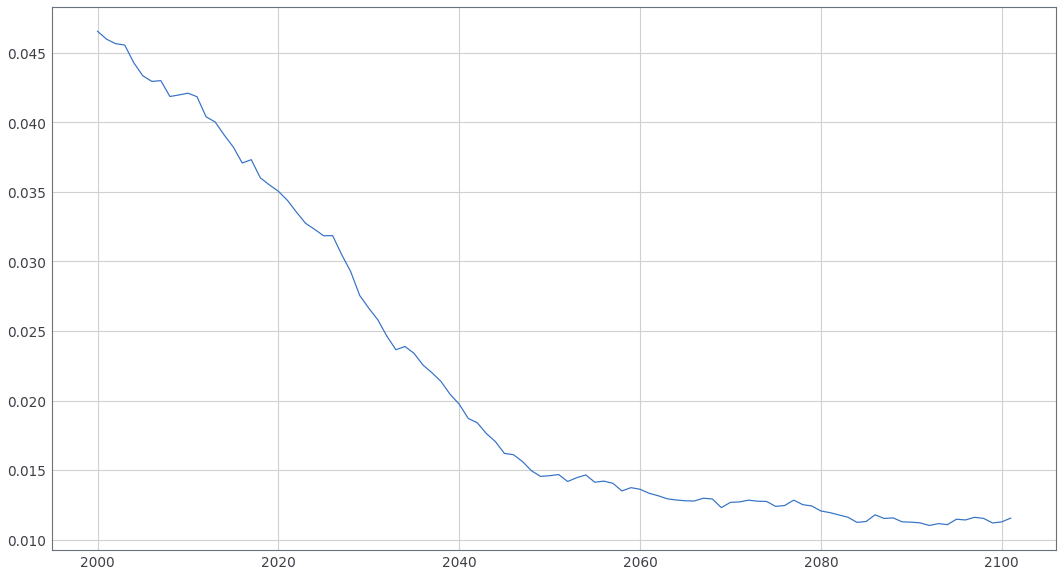

In [36]:
plt.plot(results['27_10000']['volume_glac_annual'].sel(glac_idx=3, sim=10).to_series())

In [102]:
for i in results['27_10000'].sim.values:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [103]:
series = []
for i in results['27_10000'].sim.values:
    sr = results['27_10000']['volume_glac_annual'].sel(glac_idx=3, sim=i).to_series()
    series.append(sr)
    
runs = pd.concat(series, axis=1)

In [125]:
mean = pd.concat(series, axis=1).mean(axis=1)
std = pd.concat(series, axis=1).std(axis=1)

In [141]:
std.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            ...
            2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101],
           dtype='int64', name='year_plus1', length=102)

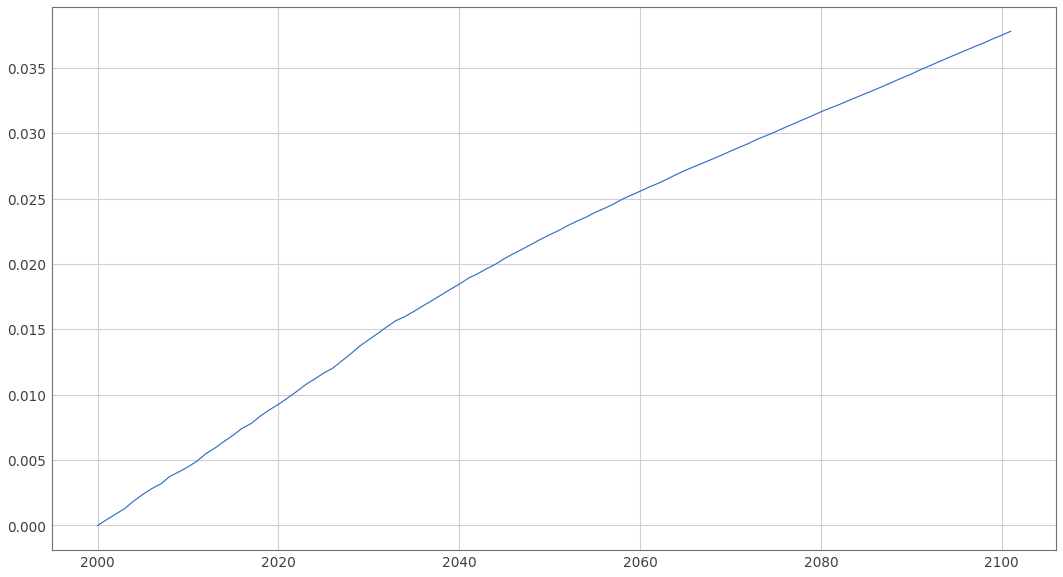

In [128]:
plt.plot(std)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

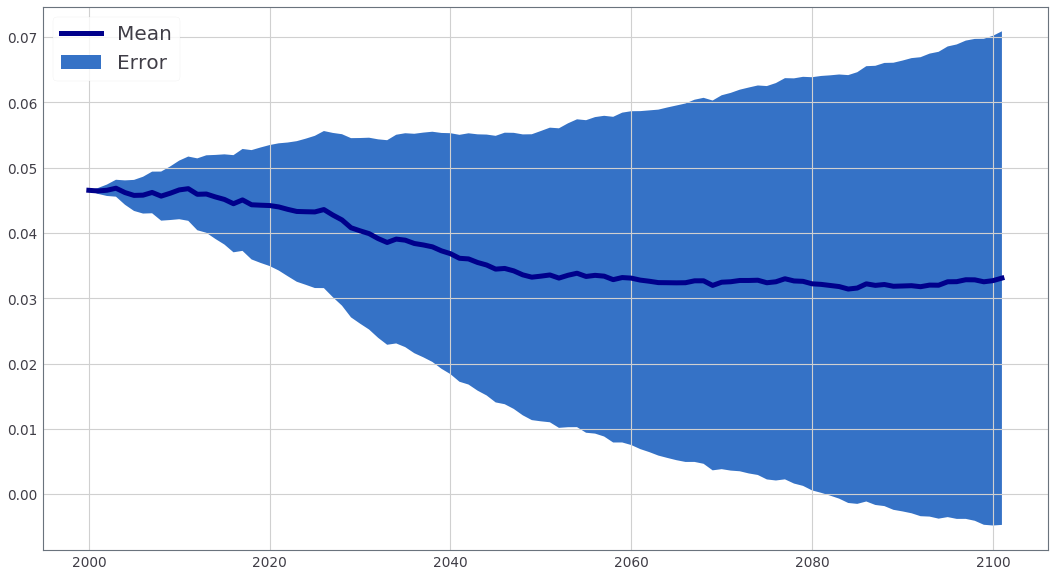

In [163]:
fig = plt.figure()

plt.plot(mean, color='darkblue', linewidth=5, label='Mean')
plt.fill_between(std.index, mean-(1*std), mean+(1*std), label='Error')
plt.legend(loc='upper left', fontsize=20)
plt.show

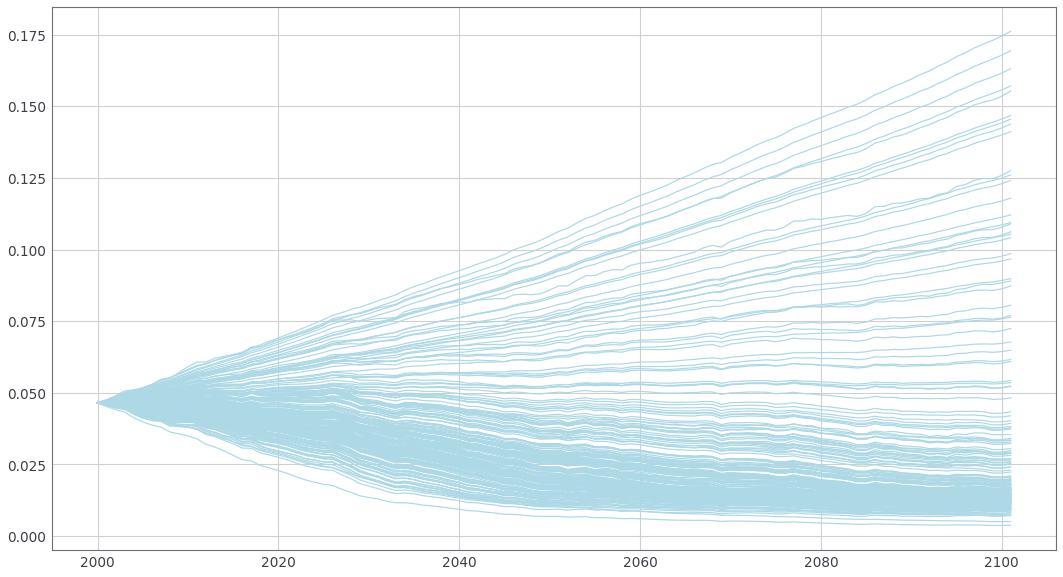

In [145]:
for i in range(200):
    plt.plot(results['27_10000']['volume_glac_annual'].sel(glac_idx=3, sim=i).to_series(), color='lightblue')

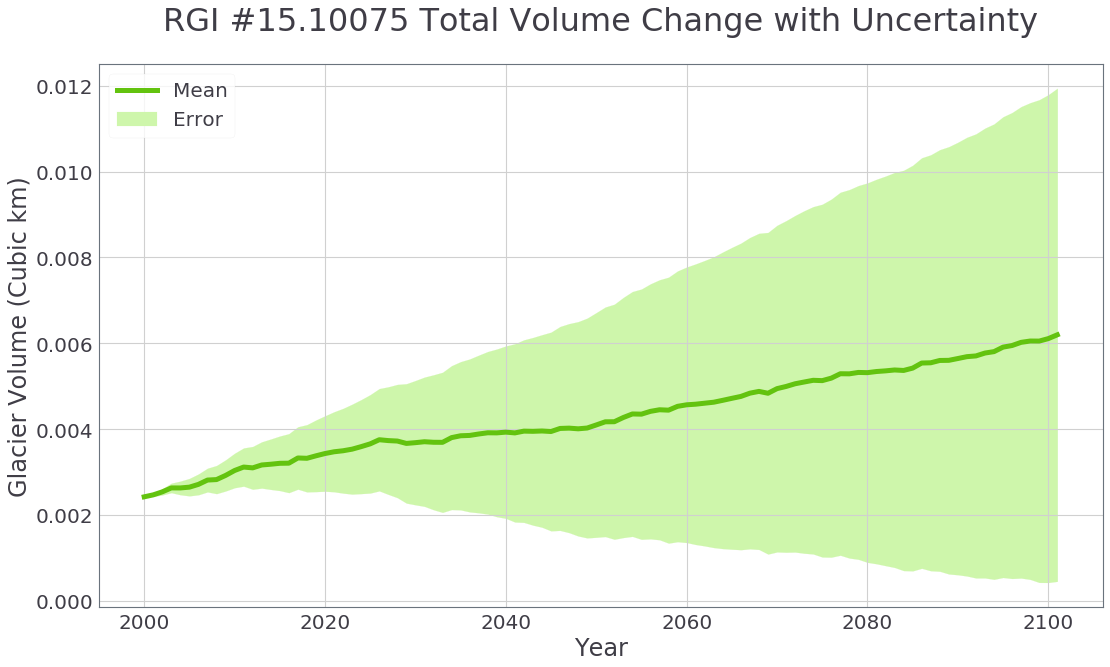

../uncertainty_plots_single_glacier/10075.png


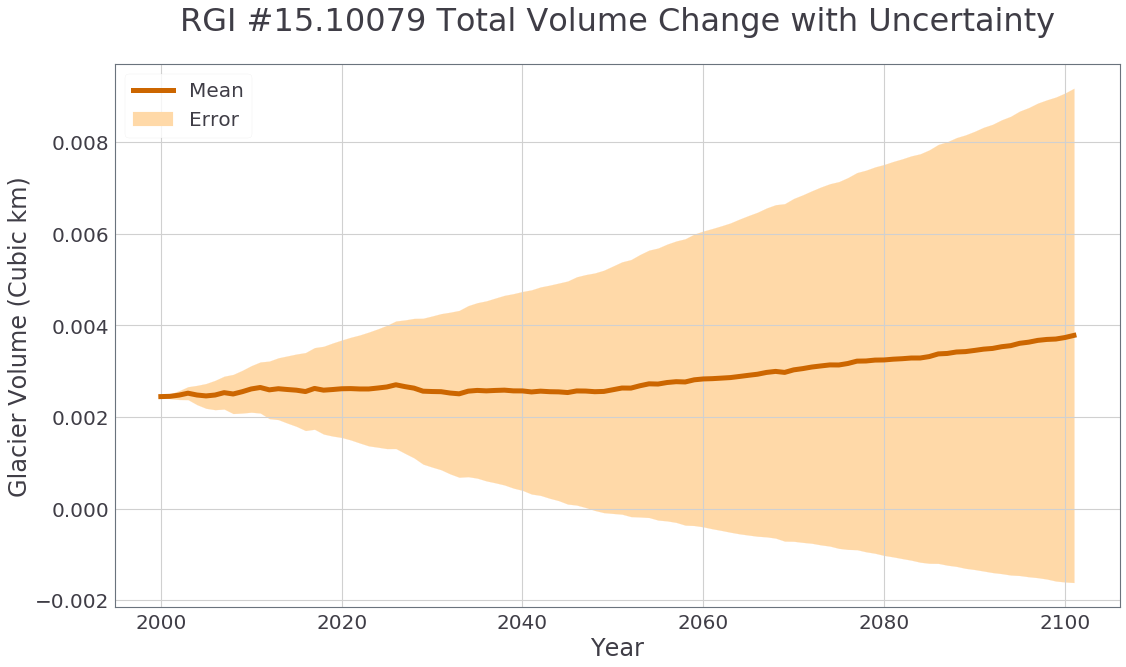

../uncertainty_plots_single_glacier/10079.png


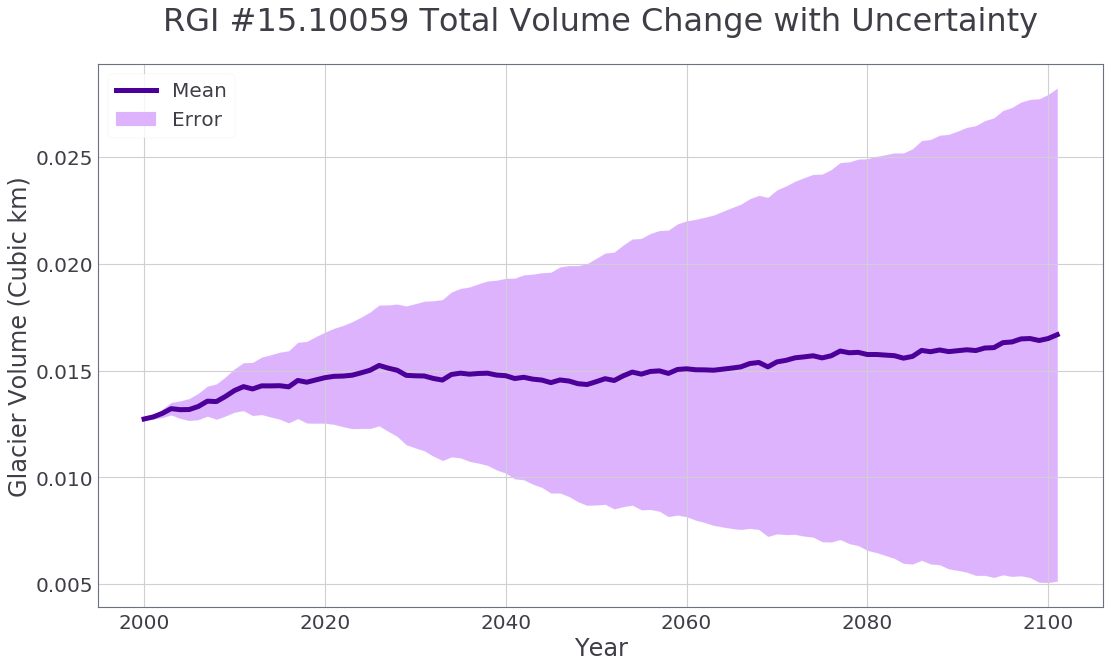

../uncertainty_plots_single_glacier/10059.png


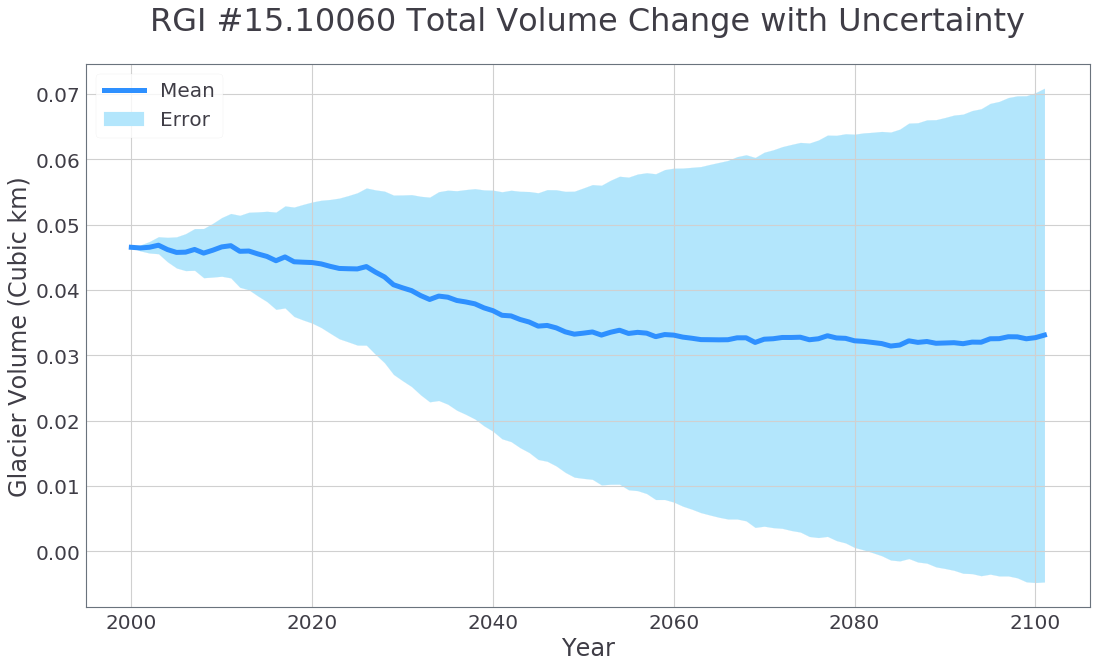

../uncertainty_plots_single_glacier/10060.png


In [196]:
num_stds = 1
glacs = {0:'10075', 1:'10079', 2:'10059', 3: '10060'}
line_colors = ['#63c30f', '#CC6600', '#4C0099', '#2E90FF']
shade_colors = ['#CEF6AB', '#FFD9A8', '#DCB3FC', '#B3E6FC']

for j in range(4):

    # get series of volume changes for different param sets
    series = []
    for run in results['27_10000'].sim.values:
        sr = results['27_10000']['volume_glac_annual'].sel(glac_idx=j, sim=run).to_series()
        series.append(sr)

    runs = pd.concat(series, axis=1)

    # find means and errors for plotting uncertainties
    mean = pd.concat(series, axis=1).mean(axis=1)
    std = pd.concat(series, axis=1).std(axis=1)

    # do the plotting
    fig = plt.figure()

    plt.plot(mean, color=line_colors[j], linewidth=5, label='Mean')
    plt.fill_between(std.index, mean-(num_stds*std), mean+(num_stds*std), label='Error', color=shade_colors[j])
    plt.legend(loc='upper left', fontsize=20)

    # niceties
    plt.title('RGI #15.' + glacs[j] + ' Total Volume Change with Uncertainty', fontsize = 32, y=1.05)
    plt.ylabel('Glacier Volume (Cubic km)', fontsize =24)
    plt.xlabel('Year', fontsize = 24)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.show()
    print('../uncertainty_plots_single_glacier/' + glacs[j] + '.png')

    #fig.savefig('../uncertainty_plots_single_glacier/' + glacs[j] + '.png')

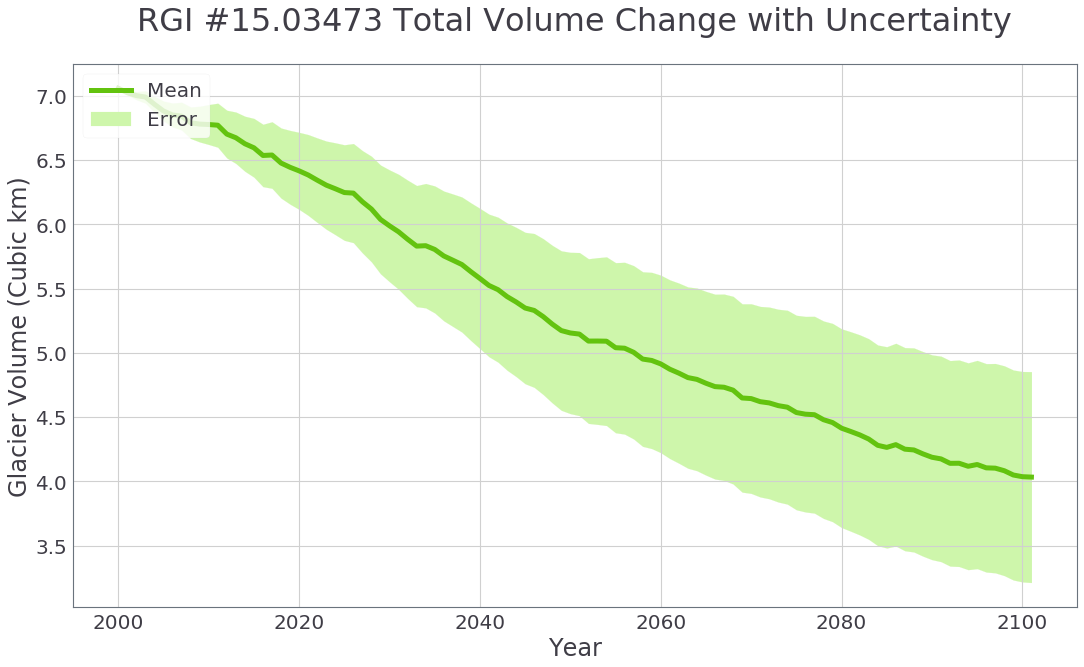

../uncertainty_plots_single_glacier/03473.png


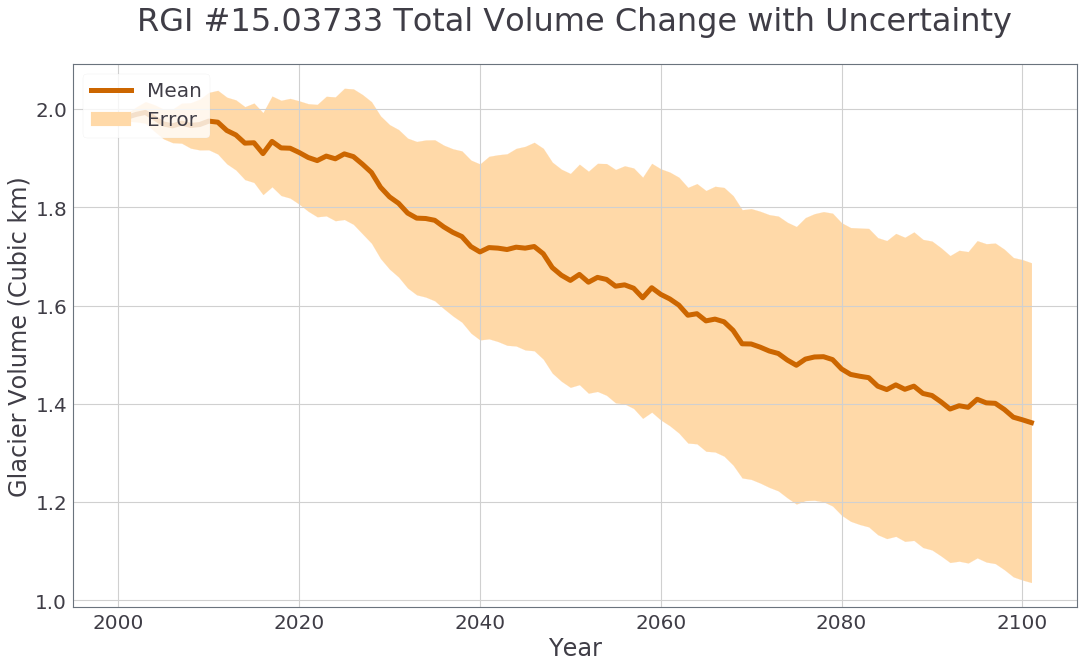

../uncertainty_plots_single_glacier/03733.png


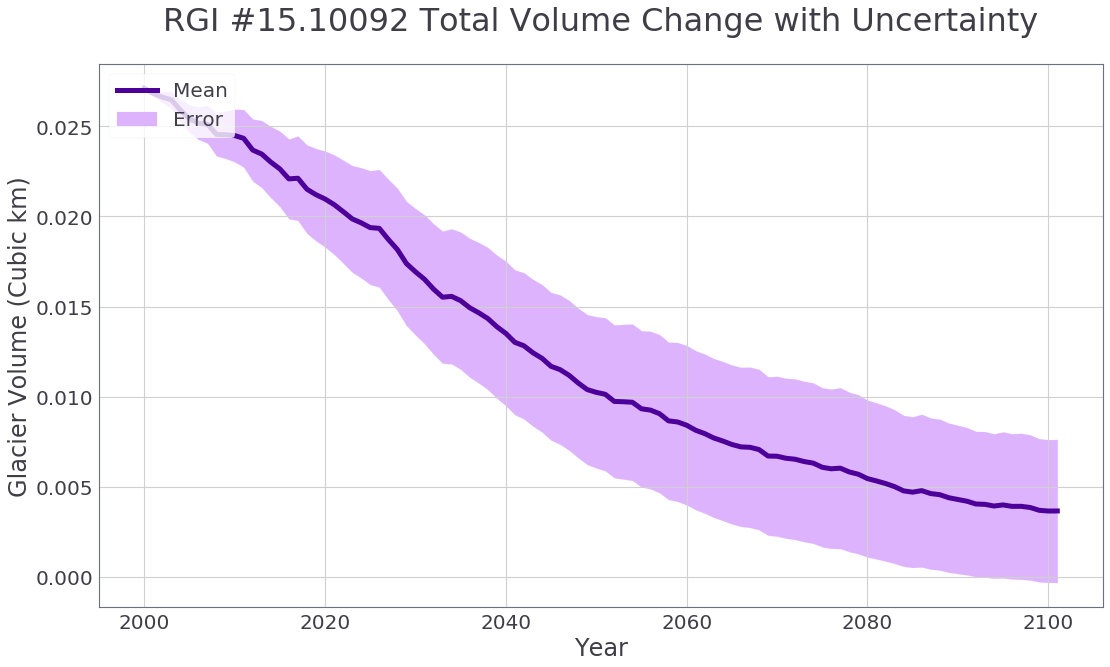

../uncertainty_plots_single_glacier/10092.png


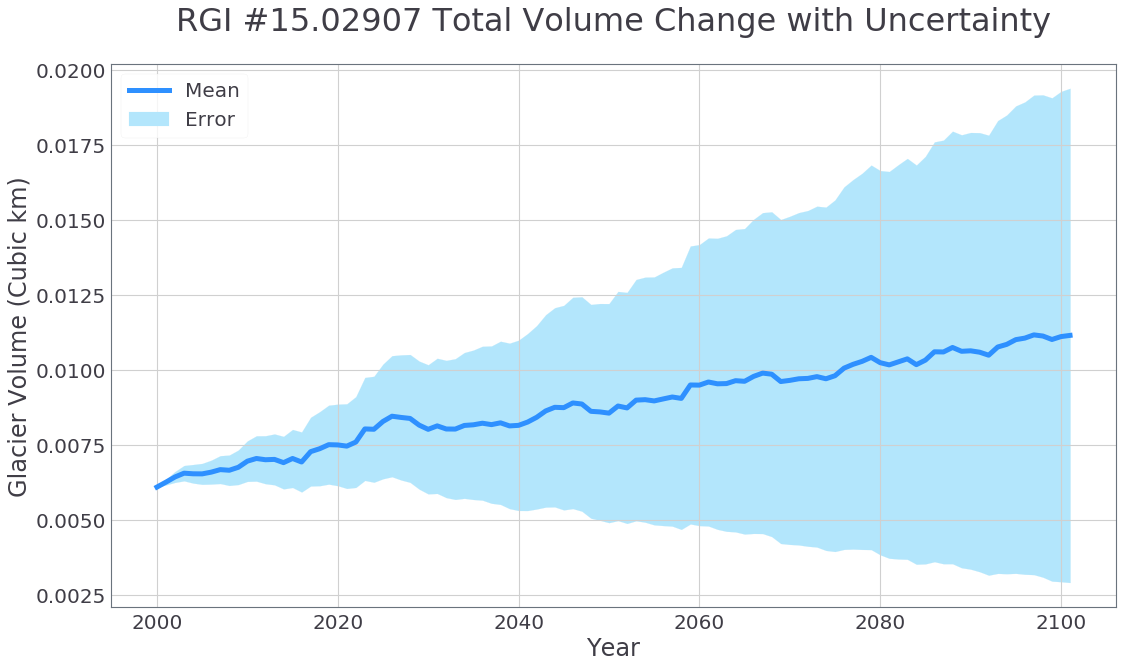

../uncertainty_plots_single_glacier/02907.png


In [203]:
glacs = [{0:'10075', 1:'10079', 2:'10059', 3: '10060'}, {0:'03473', 1:'03733', 2:'10092', 3: '02907'}]
line_colors = ['#63c30f', '#CC6600', '#4C0099', '#2E90FF']
shade_colors = ['#CEF6AB', '#FFD9A8', '#DCB3FC', '#B3E6FC']
num_stds = 1
ds_names = ['27_10000', '29_4glaciers10000']

for j in range(4):

    # get series of volume changes for different param sets
    series = []
    for run in results[ds_names[1]].sim.values:
        sr = results[ds_names[1]]['volume_glac_annual'].sel(glac_idx=j, sim=run).to_series()
        series.append(sr)

    runs = pd.concat(series, axis=1)

    # find means and errors for plotting uncertainties
    mean = pd.concat(series, axis=1).mean(axis=1)
    std = pd.concat(series, axis=1).std(axis=1)

    # do the plotting
    fig = plt.figure()

    plt.plot(mean, color=line_colors[j], linewidth=5, label='Mean')
    plt.fill_between(std.index, mean-(num_stds*std), mean+(num_stds*std), label='Error', color=shade_colors[j])
    plt.legend(loc='upper left', fontsize=20)

    # niceties
    plt.title('RGI #15.' + glacs[1][j] + ' Total Volume Change with Uncertainty', fontsize = 32, y=1.05)
    plt.ylabel('Glacier Volume (Cubic km)', fontsize =24)
    plt.xlabel('Year', fontsize = 24)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.show()
    print('../uncertainty_plots_single_glacier/' + glacs[1][j] + '.png')

    #fig.savefig('../uncertainty_plots_single_glacier/' + glacs[j] + '.png')

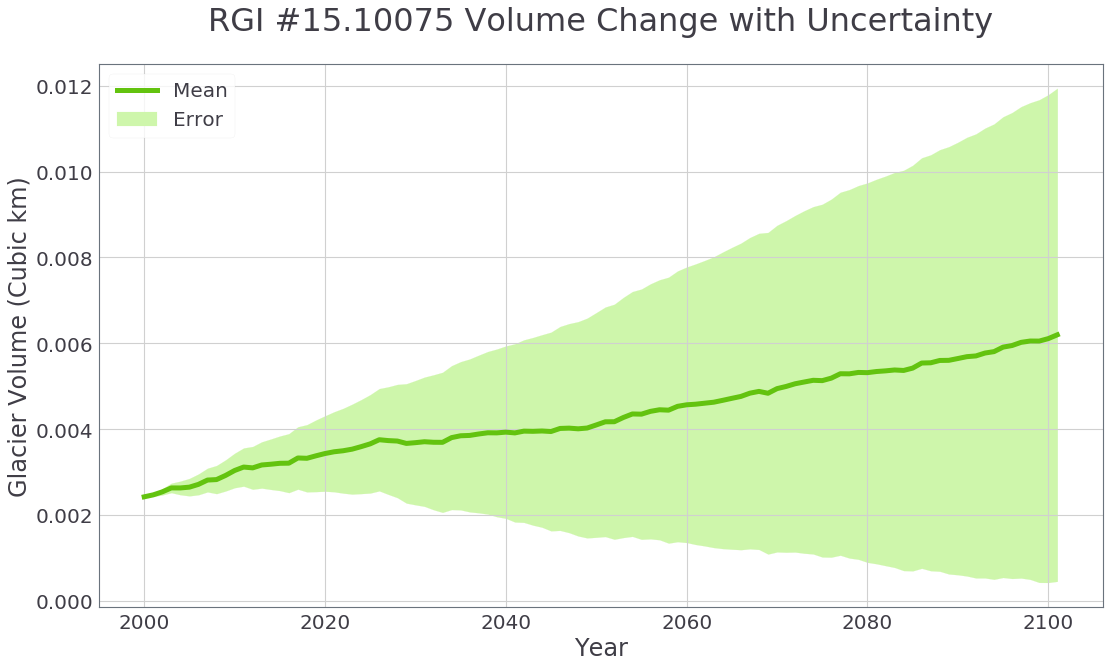

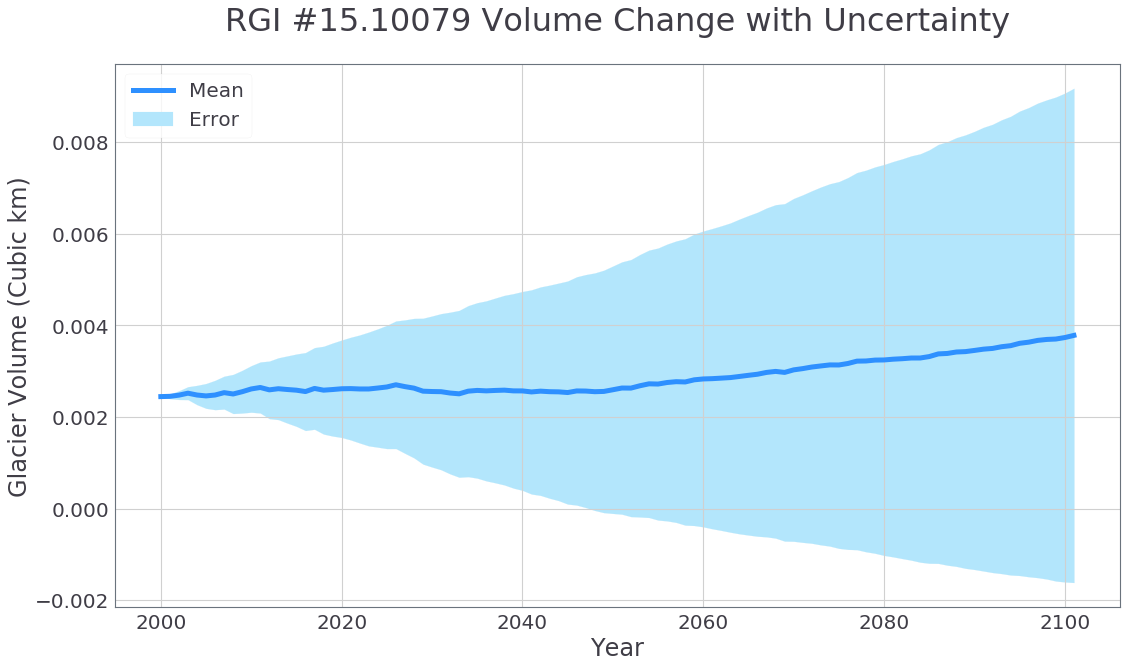

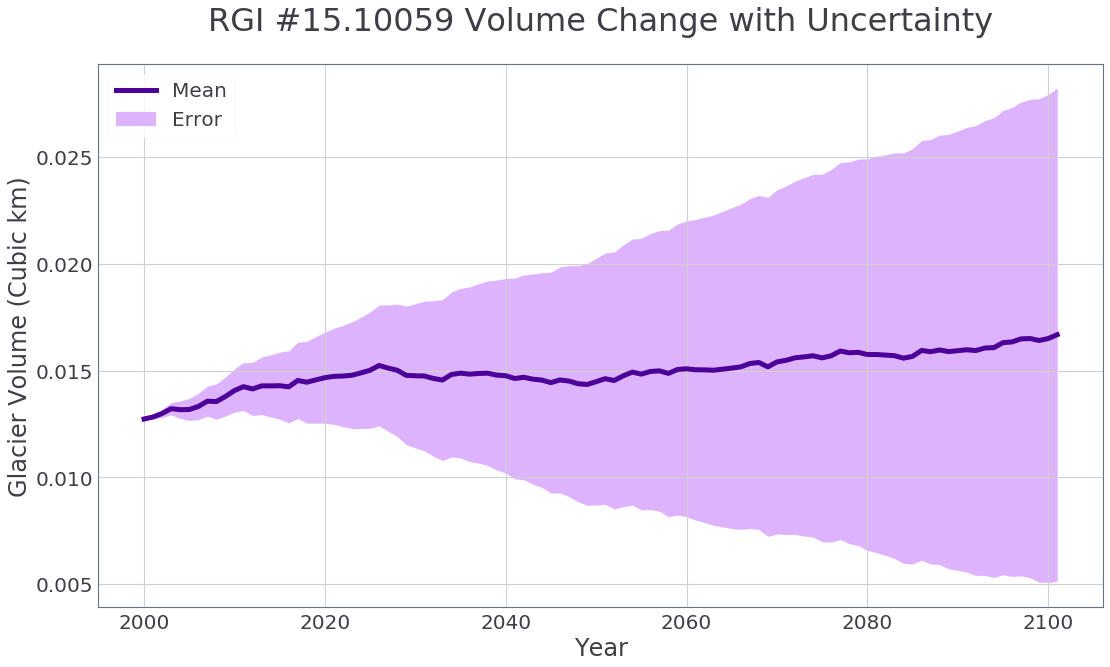

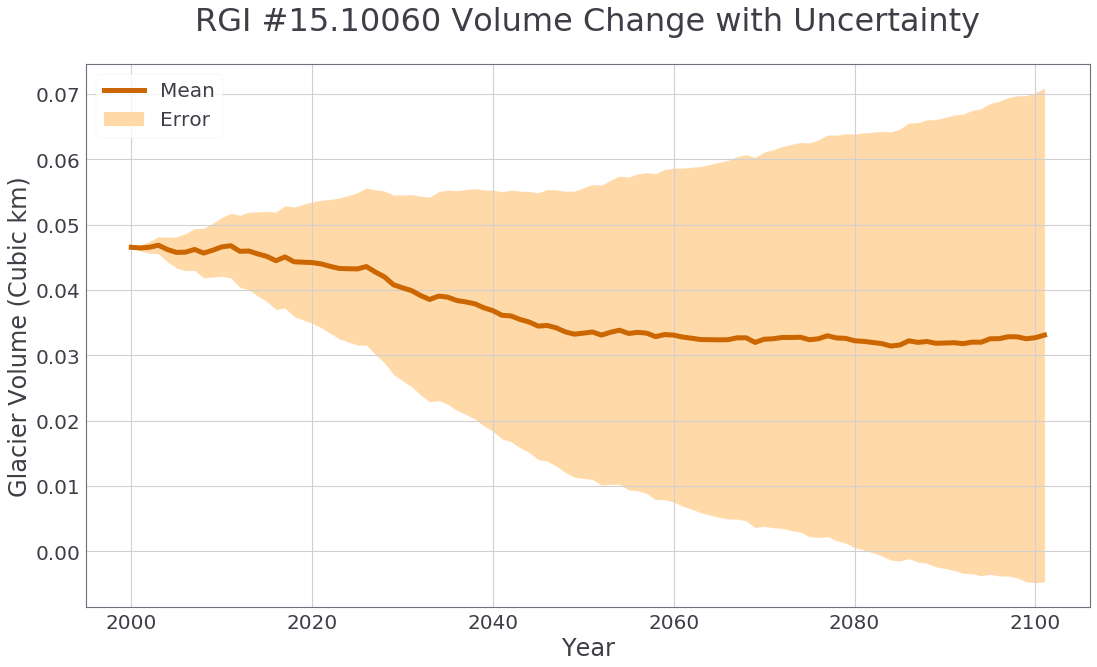

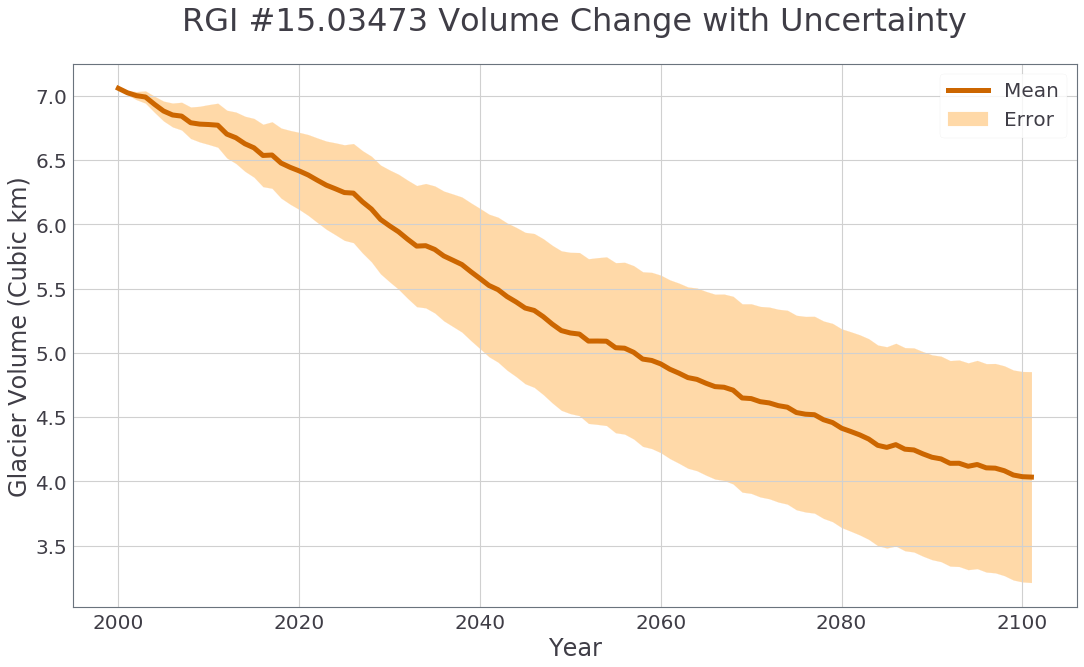

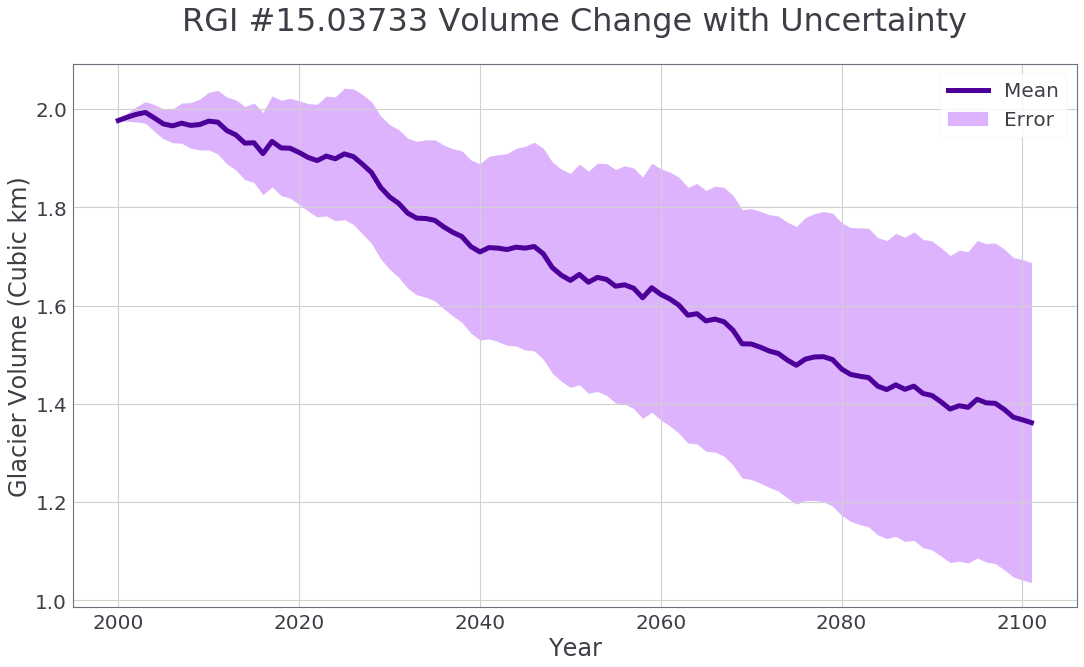

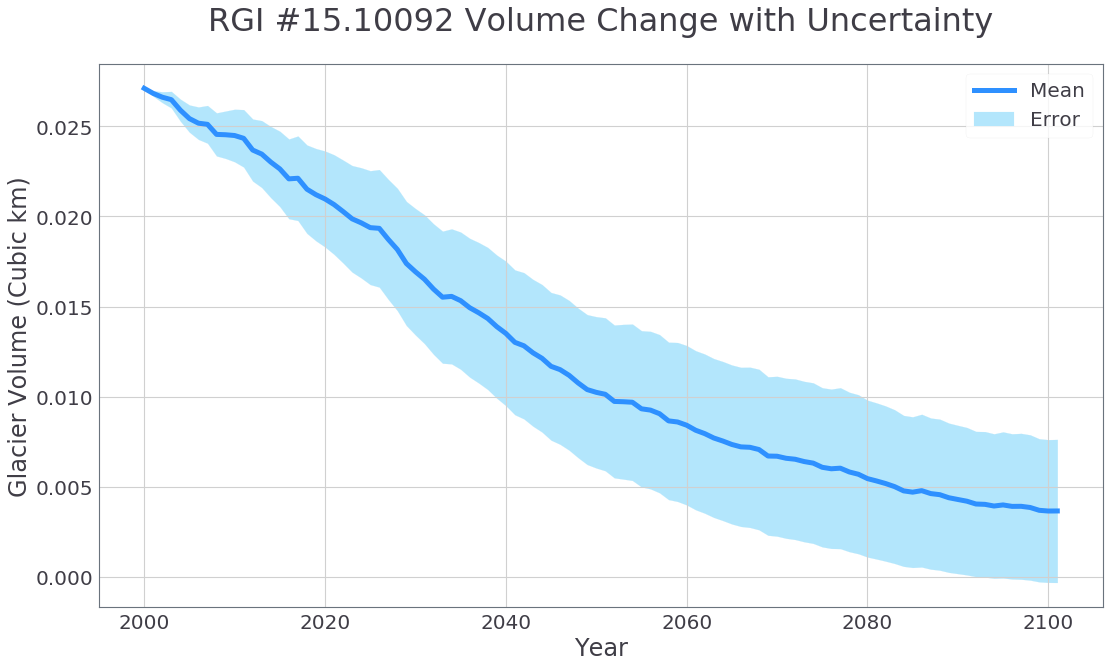

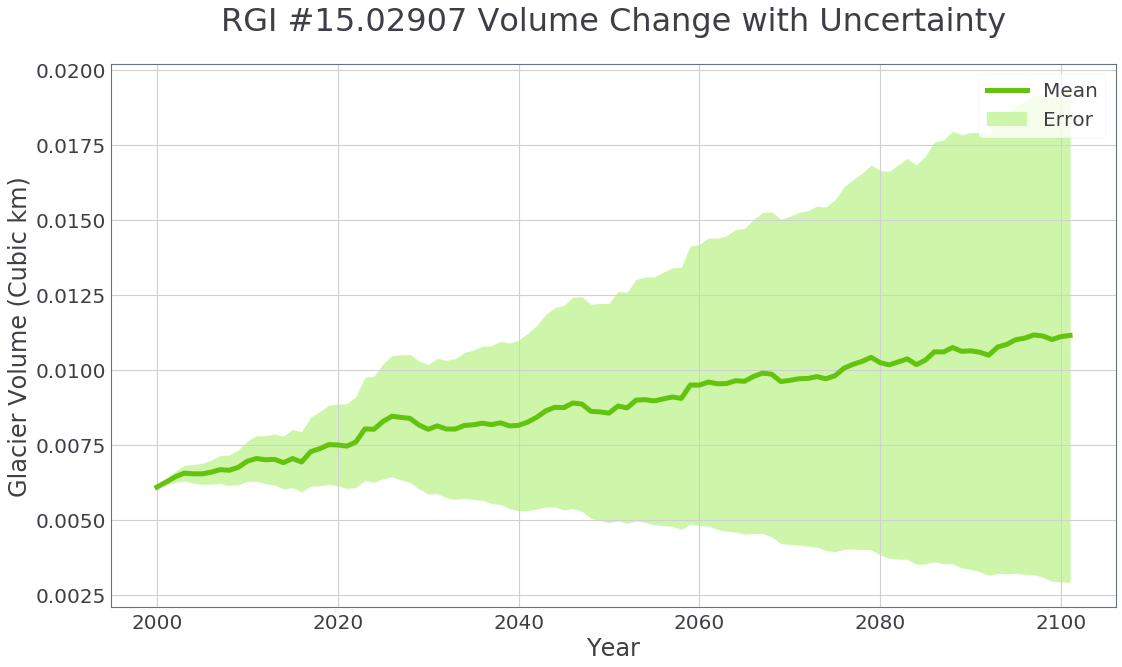

In [209]:
glacs = [{0:'10075', 1:'10079', 2:'10059', 3: '10060'}, {0:'03473', 1:'03733', 2:'10092', 3: '02907'}]
line_colors = ['#63c30f', '#2E90FF', '#4C0099', '#CC6600']
shade_colors = ['#CEF6AB', '#B3E6FC', '#DCB3FC', '#FFD9A8']
num_stds = 1
ds_names = ['27_10000', '29_4glaciers10000']

for k in range(2):

    for j in range(4):

        # get series of volume changes for different param sets
        series = []
        for run in results[ds_names[k]].sim.values:
            sr = results[ds_names[k]]['volume_glac_annual'].sel(glac_idx=j, sim=run).to_series()
            series.append(sr)

        runs = pd.concat(series, axis=1)

        # find means and errors for plotting uncertainties
        mean = pd.concat(series, axis=1).mean(axis=1)
        std = pd.concat(series, axis=1).std(axis=1)

        # do the plotting
        fig = plt.figure()

        if k == 0:
            plt.plot(mean, color=line_colors[j], linewidth=5, label='Mean')
            plt.fill_between(std.index, mean-(num_stds*std), mean+(num_stds*std), label='Error', color=shade_colors[j])
            plt.legend(loc='upper left', fontsize=20)
        else:
            plt.plot(mean, color=line_colors[3-j], linewidth=5, label='Mean')
            plt.fill_between(std.index, mean-(num_stds*std), mean+(num_stds*std), label='Error', color=shade_colors[3-j])
            plt.legend(loc='best', fontsize=20)
            
        # niceties
        plt.title('RGI #15.' + glacs[k][j] + ' Volume Change with Uncertainty', fontsize = 32, y=1.05)
        plt.ylabel('Glacier Volume (Cubic km)', fontsize =24)
        plt.xlabel('Year', fontsize = 24)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        plt.show()
        #print('../uncertainty_plots_single_glacier/' + glacs[k][j] + '.png')

        #fig.savefig('../uncertainty_plots_single_glacier/' + glacs[k][j] + '.png')

In [200]:
results['29_4glaciers10000'].glacier_table

<xarray.DataArray 'glacier_table' (glac_idx: 4, glac_table: 16)>
array([[  3.472000e+03,   8.671591e+01,   2.808947e+01,   1.500000e+01,
          2.000000e+00,   6.105400e+01,   4.702000e+03,   8.181000e+03,
          5.815000e+03,   1.650000e+01,   1.800000e+02,   1.828500e+04,
          0.000000e+00,   0.000000e+00,   3.473000e+03,   1.503473e+01],
       [  3.732000e+03,   8.690324e+01,   2.797472e+01,   1.500000e+01,
          2.000000e+00,   1.909700e+01,   4.926000e+03,   7.870000e+03,
          5.568000e+03,   1.750000e+01,   2.620000e+02,   1.539600e+04,
          0.000000e+00,   0.000000e+00,   3.733000e+03,   1.503733e+01],
       [  1.009100e+04,   8.701800e+01,   2.819400e+01,   1.500000e+01,
          2.000000e+00,   5.720000e-01,   5.500000e+03,   6.001000e+03,
          5.736000e+03,   1.530000e+01,   3.600000e+02,   2.048000e+03,
          0.000000e+00,   0.000000e+00,   1.009200e+04,   1.510092e+01],
       [  2.906000e+03,   8.815243e+01,   2.790921e+01,   1.500000e+